# BATCH GRADIENT DESCENT

In [1]:
# importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [3]:
# READING THE  DATA SET
data = pd.read_excel(r"C:\Users\SAIDEEPTHI\Downloads\pressure_weight.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


# DATA ANALYSIS AND VISUALISATION

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

,X,Y
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


NULL value Treatment

In [7]:
data.isnull().sum()

X    0
Y    0
dtype: int64

no null values

# Outliers Treatment

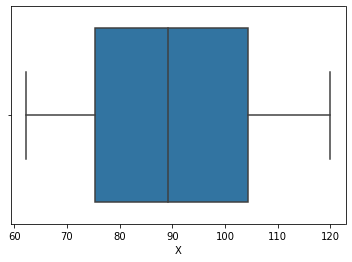

In [9]:
sns.boxplot(x=data['X'])

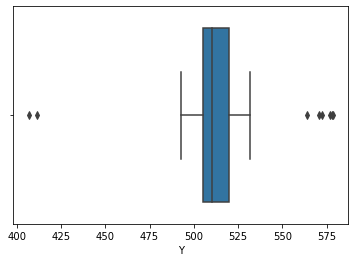

In [10]:
sns.boxplot(x=data['Y'])

There are some outliers,removing them using
1.z-score 2.ITQ

In [12]:
# Z-SCORE
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


In [13]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


no outliners are found using Z-score test

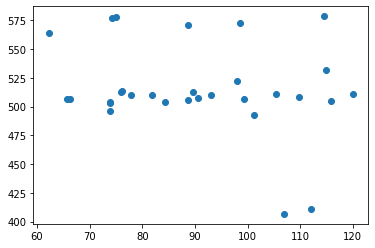

In [14]:
# Visualising data points using a Scatter plot
plt.scatter(data['X'],data['Y'])

In [15]:
# Implementing ITQ
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr

X    29.075
Y    14.600
dtype: float64

In [16]:
data.shape

(30, 2)

In [17]:
data_cleared = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(22, 2)

After implementing ITQ, 8 rows are treated as outliners and those are ignored from dataset

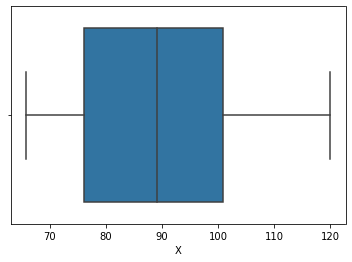

In [18]:
sns.boxplot(x=data_cleared['X'])

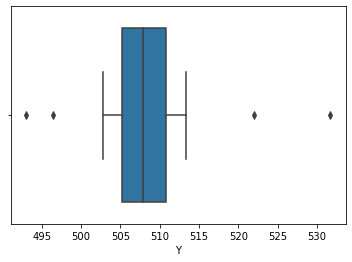

In [19]:
# outliners are reduced
sns.boxplot(x=data_cleared['Y'])

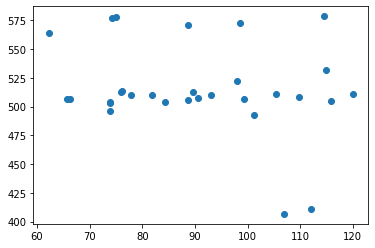

In [20]:
# scatter plot of data before data clean
plt.scatter(data['X'],data['Y'])

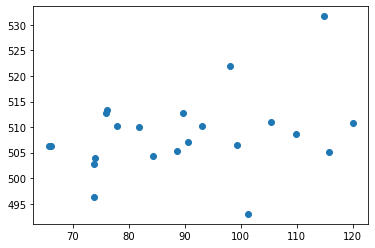

In [21]:
#scatter plot of data after data clean
plt.scatter(data_cleared['X'],data_cleared['Y'])

In [23]:
data2 = data.copy()
data = data_cleared.copy()

In [24]:
from sklearn.model_selection import train_test_split

Normalisation Of Data Set

In [25]:
data_x = data['X']
data_y = data['Y']

# normalising the data
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x

data_x = np.array(data_x)
data_y = np.array(data_y)
datas =[]
for i in range(len(data_x)):
  datas.append([data_x[i],data_y[i]])

datas[1:10]

[[0.45672191528545114, 0.364341085271318],
 [0.14917127071823194, 0.08785529715762205],
 [0.9226519337016574, 0.31524547803617503],
 [0.6206261510128914, 0.3462532299741592],
 [0.5027624309392265, 0.44444444444444364],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.009208103130755065, 0.34366925064599474],
 [0.22467771639042364, 0.44444444444444364]]

In [26]:
# splitting of data set into training and testing
data_train,data_test = train_test_split(datas,test_size=0.1)

In [27]:
data_train

[[0.14917127071823194, 0.2532299741602067],
 [0.009208103130755065, 0.34366925064599474],
 [0.0, 0.3410852713178288],
 [0.45672191528545114, 0.364341085271318],
 [0.5027624309392265, 0.44444444444444364],
 [0.22467771639042364, 0.44444444444444364],
 [0.44014732965009196, 0.5116279069767424],
 [0.19337016574585636, 0.5271317829457353],
 [0.4217311233885818, 0.3204134366925055],
 [1.0, 0.4599483204134365],
 [0.29834254143646416, 0.4392764857881132],
 [0.1878453038674034, 0.5116279069767424],
 [0.6556169429097605, 0.0],
 [0.9226519337016574, 0.31524547803617503],
 [0.7311233885819522, 0.4625322997416009],
 [0.8121546961325966, 0.40310077519379856],
 [0.5948434622467771, 0.7493540051679578],
 [0.6206261510128914, 0.3462532299741592],
 [0.3425414364640883, 0.2919896640826873]]

Ready To Train The Model

In [29]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 300
alpha = 0.1
error = []
data_train

[[0.14917127071823194, 0.2532299741602067],
 [0.009208103130755065, 0.34366925064599474],
 [0.0, 0.3410852713178288],
 [0.45672191528545114, 0.364341085271318],
 [0.5027624309392265, 0.44444444444444364],
 [0.22467771639042364, 0.44444444444444364],
 [0.44014732965009196, 0.5116279069767424],
 [0.19337016574585636, 0.5271317829457353],
 [0.4217311233885818, 0.3204134366925055],
 [1.0, 0.4599483204134365],
 [0.29834254143646416, 0.4392764857881132],
 [0.1878453038674034, 0.5116279069767424],
 [0.6556169429097605, 0.0],
 [0.9226519337016574, 0.31524547803617503],
 [0.7311233885819522, 0.4625322997416009],
 [0.8121546961325966, 0.40310077519379856],
 [0.5948434622467771, 0.7493540051679578],
 [0.6206261510128914, 0.3462532299741592],
 [0.3425414364640883, 0.2919896640826873]]

# Gradient Descent Algorithm

In [30]:
# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  der_m = 0
  der_c = 0
  err = 0
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m += ((data_train[i][1] - (m * data_train[i][0]) - c ))*(data_train[i][0])
    der_c +=  (data_train[i][1] - (m * data_train[i][0]) - c )

  # computing error rate with present m and c values 
  err = (der_c)**2
  err = (err)/(2*len(data_train))
  error.append(err)


  der_m = (-1)*(1/len(data_train))*der_m
  der_c = (-1)*(1/len(data_train))*der_c

  # calculating change in m and c
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c

  #updating m and c
  m = m + change_m
  c = c + change_c


  #incrementing no of iterations
  iter = iter + 1

In [31]:
# computed slope and y-intercept
print(m,c)

0.18510212858019362 0.3069958921015323


In [32]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.15101289 0.90423573 0.14917127]


array([0.28165375, 1.        , 0.0878553 ])

In [34]:
# predicting results of test data set
pred = []
for i in range(len(data_test_x)):
    print((m*data_test_x[i]) +c)
    pred.append((m*data_test_x[i]) +c)

0.3349486997324271
0.4743718499889633
0.3346078118344893


# Mean Square error of testing data

In [36]:
# computig mean squared error of testing data
mse = 0
for i in range(0,len(data_test)):
    mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

0.1133373691982157

# Predicted Data Visualisation

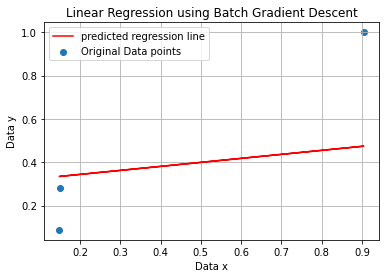

In [37]:
plt.scatter(data_test_x,data_test_y,label="Original Data points")
plt.plot(data_test_x,pred,'r',label="predicted regression line")
plt.title("Linear Regression using Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

In [38]:
data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train[0] + c
data_train_pred

0     0.334608
1     0.308700
2     0.306996
3     0.391536
4     0.400058
5     0.348584
6     0.388468
7     0.342789
8     0.385059
9     0.492098
10    0.362220
11    0.341766
12    0.428352
13    0.477781
14    0.442328
15    0.457327
16    0.417103
17    0.421875
18    0.370401
Name: 0, dtype: float64

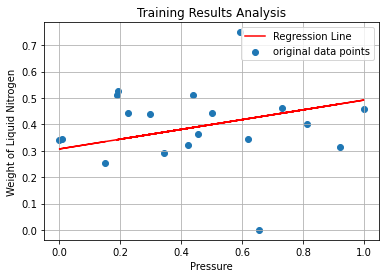

In [39]:
plt.plot(data_train[0],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [40]:
data_train.head()

,0,1
0,0.149171,0.253230
1,0.009208,0.343669
2,0.000000,0.341085
3,0.456722,0.364341
4,0.502762,0.444444


# Error Rate Analysis

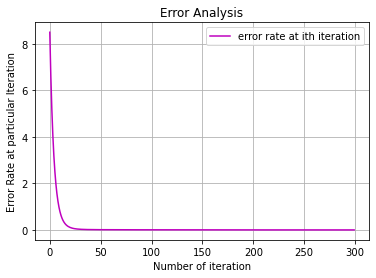

In [41]:
iters = np.arange(epochs)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()

# Mean Square Error Of Training Data

In [42]:
# computig mean squared error
mse = 0
mse = (data_train[1] - m*data_train[0] - c)**2
mse.sum()/len(data_train)

0.02345104484988352

In [43]:
min_x = data2['X'].min()
max_x = data2['X'].max()
min_y = data2['Y'].min()
max_y = data2['Y'].max()
print(min_x,min_y,max_x,max_y)

62.2 406.7 120.0 578.6


Model Ready To Take Input and Produce Output

In [44]:
input_x = float(input("enter pressure"))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

enter pressure75.1


466.57407864719914

In [45]:
err = 0
for i in range(0,len(data_x)):
  input_x = data2['X'][i]
  input_x = (input_x - min_x)/(max_x - min_x)
  output_y = m*input_x + c
  output_y = (output_y)*(max_y - min_y) + min_y
  err += (output_y-data2['Y'][i])**2
  print(output_y,data2['Y'][i])

print("\n",err)
print(err/len(data_x))

466.57407864719914 577.8
466.13367648937304 577.0
474.0609153302428 570.9
488.31893518986254 578.6
479.4558417636124 572.4
486.88762817692776 411.2
488.4290357293191 531.7
459.4725938522534 563.9
484.1351146905147 406.7
475.05182018535146 507.1
465.85842514073175 496.4
488.9795384266017 505.2
479.95129419116677 506.4
476.428076928558 510.2
465.91347541046 503.9
461.39935329274255 506.2
461.6746046413839 506.3
468.11548619959046 510.2
485.676522242906 508.6
483.2543103748625 510.9
474.0058650605145 505.4
474.5563677577971 512.8

 90345.51348897556
4106.614249498889
